In [40]:

using Latexify
using AbstractAlgebra
using GLMakie

In [41]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [42]:
Makie.inline!(true)

true

# DETERMINANTS: 
NUMBERS THAT SAY A LOT

In [43]:
R, (x, a, b, c, d, e, f, g, h, i) = polynomial_ring(QQ, [:x, :a, :b, :c, :d, :e, :f, :g, :h, :i])

(Multivariate polynomial ring in 10 variables over rationals, AbstractAlgebra.Generic.MPoly{Rational{BigInt}}[x, a, b, c, d, e, f, g, h, i])

## The 1 × 1 and 2 × 2 Determinants

$$
\begin{bmatrix}
a 
\end{bmatrix}^-1 =
\begin{bmatrix}
1 \\ a 
\end{bmatrix}
$$

This is acctualy not possible with this polynomial_ring variable but the latext markdown inlustrate the assumption that if a is non zero this would be a valid equation.

In [44]:
[a] ~ [1//a]

AbstractAlgebra.Generic.MPoly{Rational{BigInt}}[a] ~ AbstractAlgebra.Generic.FracFieldElem{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}[1//a]

In [45]:
A = R[a b;
      c d]

[a   b]
[c   d]

assume that A is an inv(A) or A^-1:
$$
\begin{matrix}
    a & b \\
    c & d
\end{matrix}^-1
$$

with the determinant as:
$$
1 \\ ad -bc
$$


In [46]:
A ~ det(A) * R[d -b; -c  a]

[a b; c d] ~ [a*d^2-b*c*d -a*b*d+b^2*c; -a*c*d+b*c^2 a^2*d-a*b*c]

**If the expression 1 \\ ad - bc != 0 then the determinat is no zero this mean the matrix is invertable.**

Example:

In [47]:
A = R[1 -2; -3 4]

[ 1   -2]
[-3    4]

With the above assumptions the equation here can then be resolve and is valid.
$$
det[
\begin{matrix}
   1 & -2 \\
   -3 & 4 
\end{matrix}] = (1)(4) - (-2)(-3) = 4 - 6 = -2
$$

In [48]:
is_invertible(A)

true

A is invertable so then.

In [49]:
det(A) ~ (1)(4) - (-2)(-3) ~ 4 - 6 ~ -2

-2 ~ -2 ~ -2 ~ -2

## The 3 × 3 Determinant

In [50]:
A = R[a b c; d e f; g h i]

[a   b   c]
[d   e   f]
[g   h   i]

In [51]:
is_invertible(A)

false

If I try to compute a derminat of this Matrix A it will try solve it recusively using alternating sings.

In [52]:
Δ = det(A)

ErrorException: invalid redefinition of constant Main.Δ

And because it is not an invertible the Δ equation should fail!

In [53]:
inv(A)

DomainError: DomainError with [a b c; d e f; g h i]:
Matrix is not invertible.

In [54]:
M = R[1 0 0;
      4 5 6
      7 8 9]

[1   0   0]
[4   5   6]
[7   8   9]

In [55]:
is_invertible(M)

true

In [56]:
Δ ~ -3

Δ ~ -3

In [57]:
delta(Δ) = Δ ~ -3

delta (generic function with 1 method)

In [58]:
delta(det(M))

-3 ~ -3

In [65]:
Δ(A) = +A[:1, :1] * det(transpose(R[A[:2, 2:3] A[:3, 2:3]])) - A[:1, :2] * det(R[A[:2, :1] A[:2, :3]; A[:3, :1] A[:3, :3]] + A[:1, :3]) * det(transpose(R[A[:2, 1:2] A[:3, 1:2]]))

Δ (generic function with 1 method)

In [66]:
Δ(A)

a*e*i - a*f*h - b*c^2*d*h + b*c^2*e*g - b*c*d^2*h + b*c*d*e*g - b*c*d*h*i + b*c*e*g*i - b*d^2*h*i + b*d*e*g*i + b*d*f*g*h - b*e*f*g^2

In [68]:
M

[1   0   0]
[4   5   6]
[7   8   9]

In [69]:
Δ(M) ~ -3

-3 ~ -3

## The Geometric Meaning of
the n × n Determinant

Lets then vizualize it!

In [89]:
A = Matrix([1  0  0;
4  5  6;
7  8  9])

3×3 Matrix{Int64}:
 1  0  0
 4  5  6
 7  8  9

In [90]:
A

3×3 Matrix{Int64}:
 1  0  0
 4  5  6
 7  8  9

Here we see what our 3 X 3 Matrix is, a 3 object.

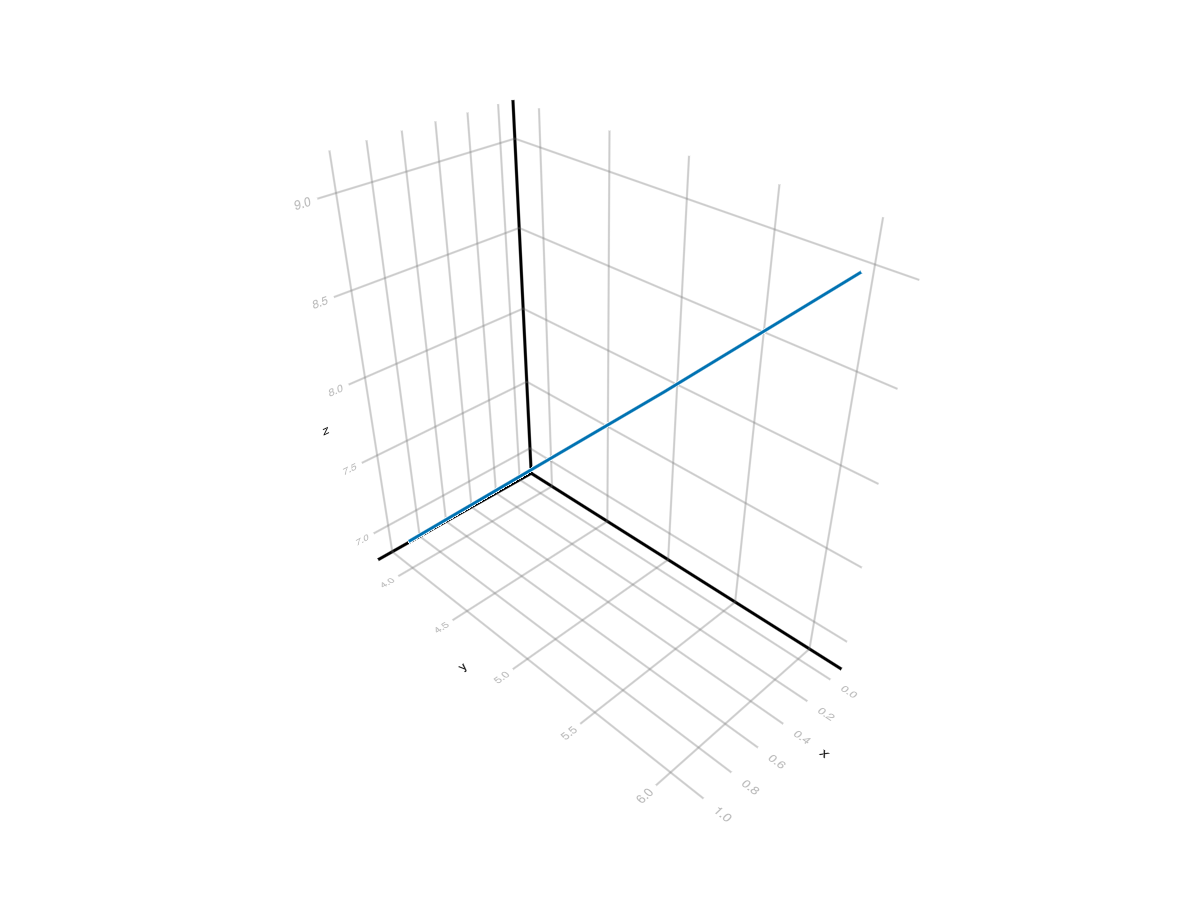

In [95]:
lines(A)

What is the scaler of the determinant and ist rows?

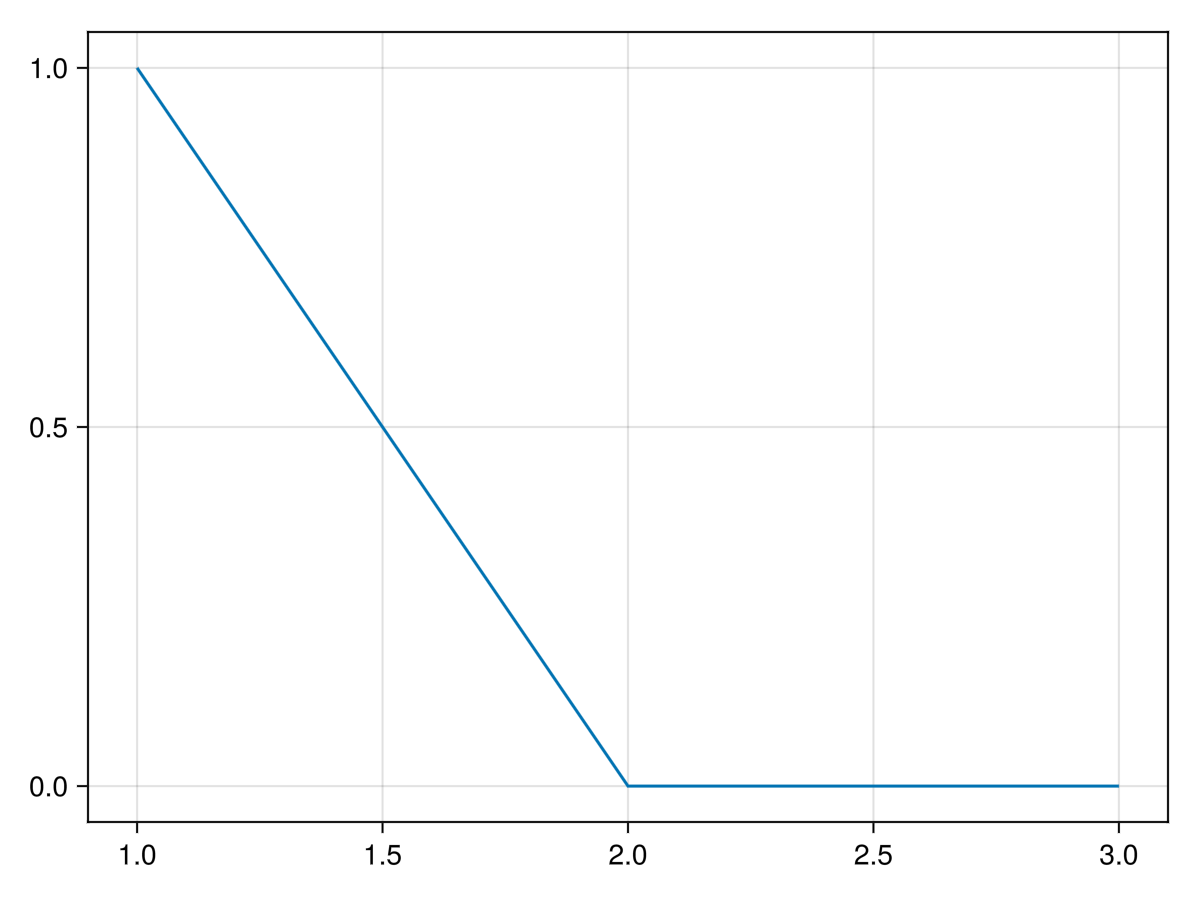

In [ ]:
lines(A[:1, :])

Is the inverse of it.

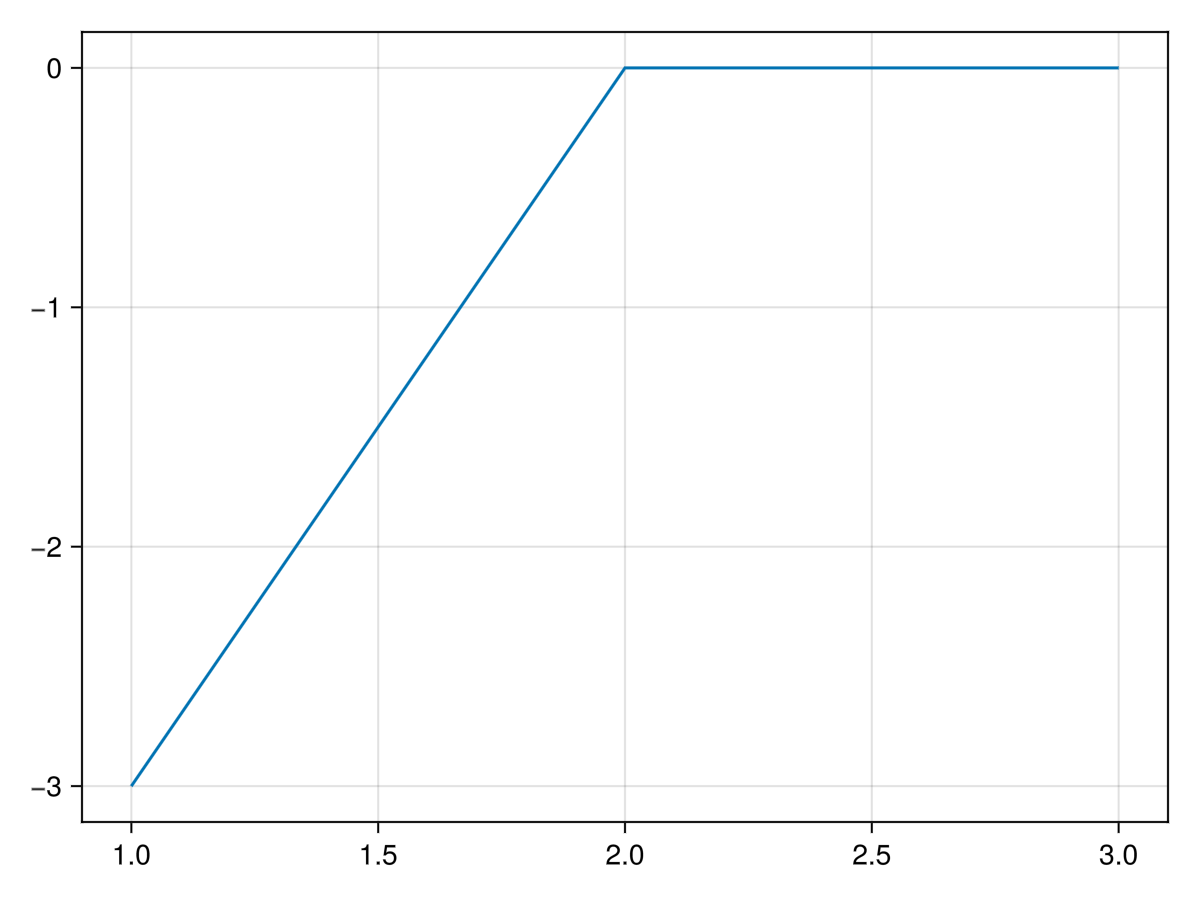

In [109]:
lines(A[:1, :] * det(A))

The is the same for all the other rows.

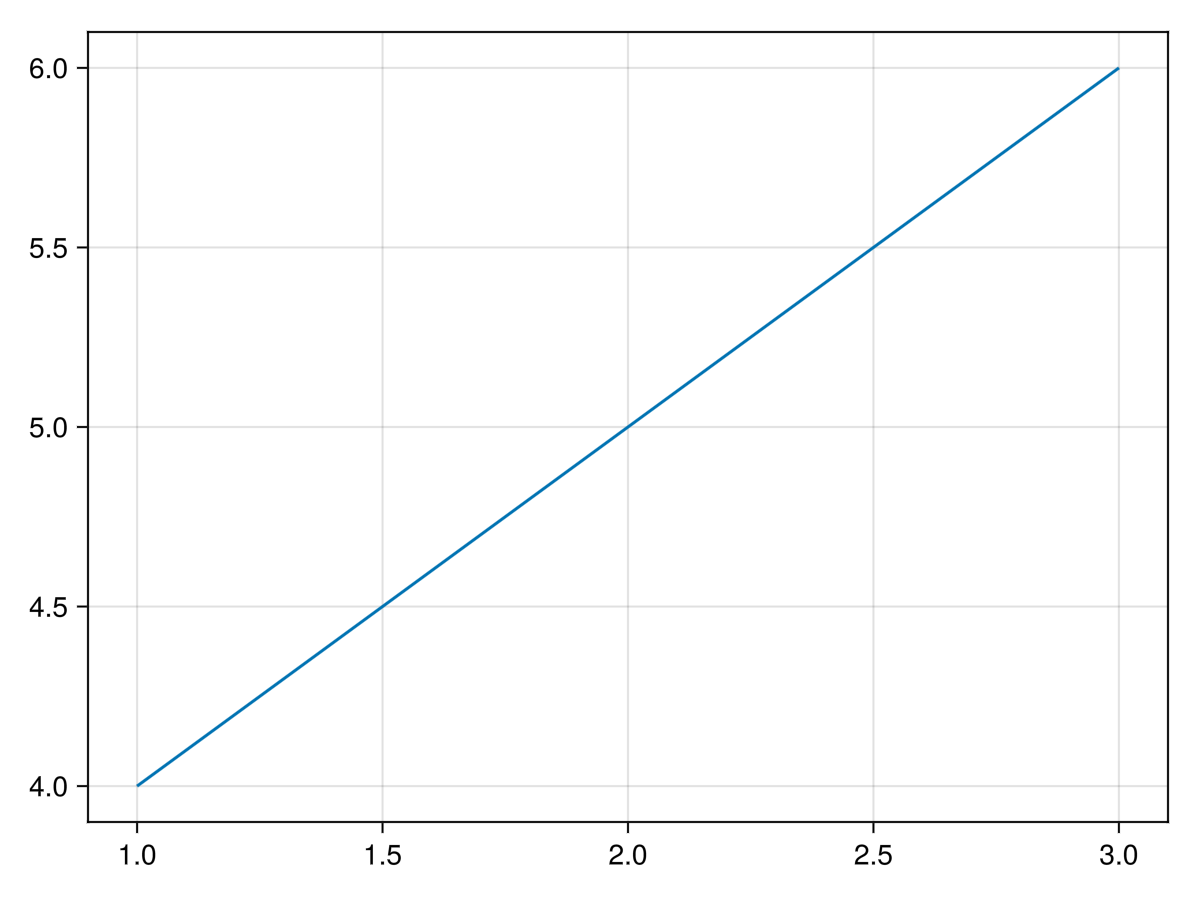

In [102]:
lines(A[:2, :])

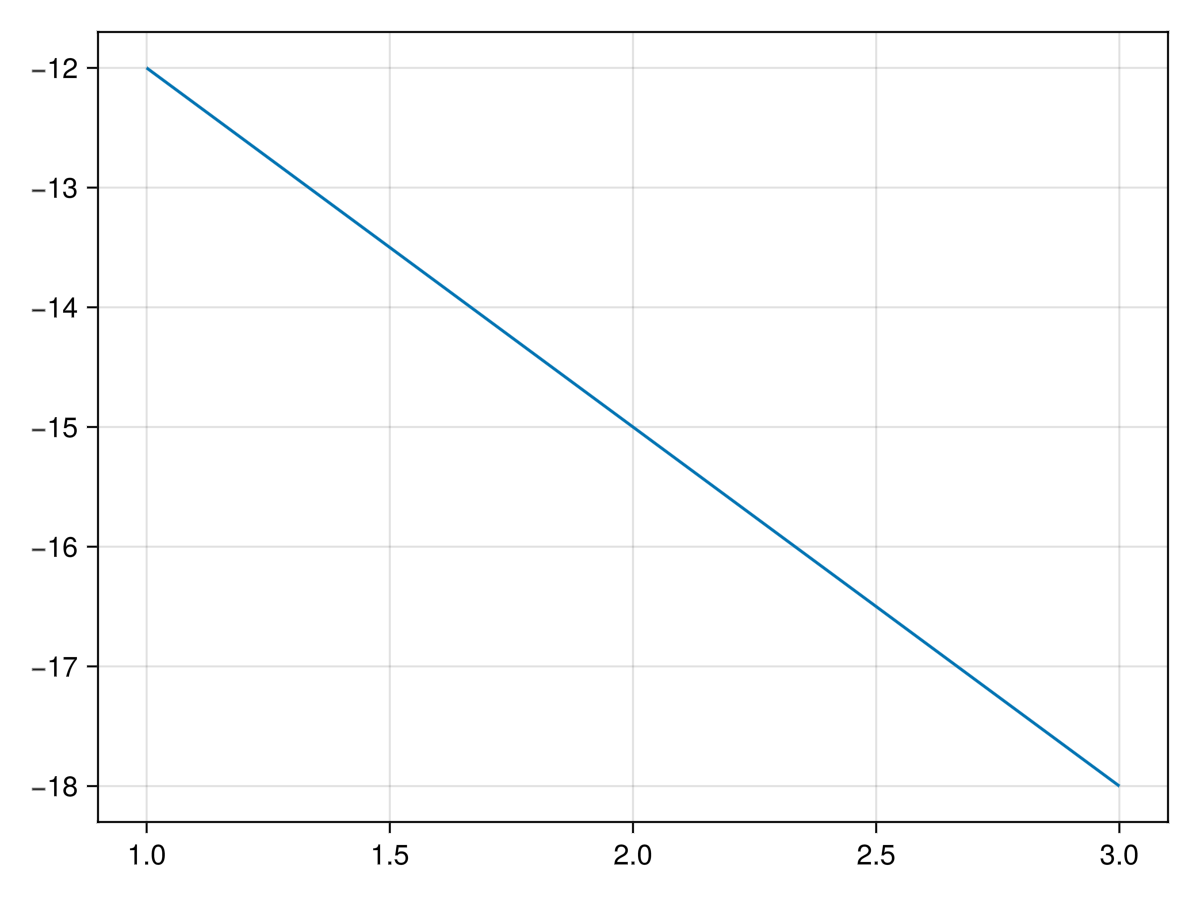

In [104]:
lines(A[:2, :] * det(A))

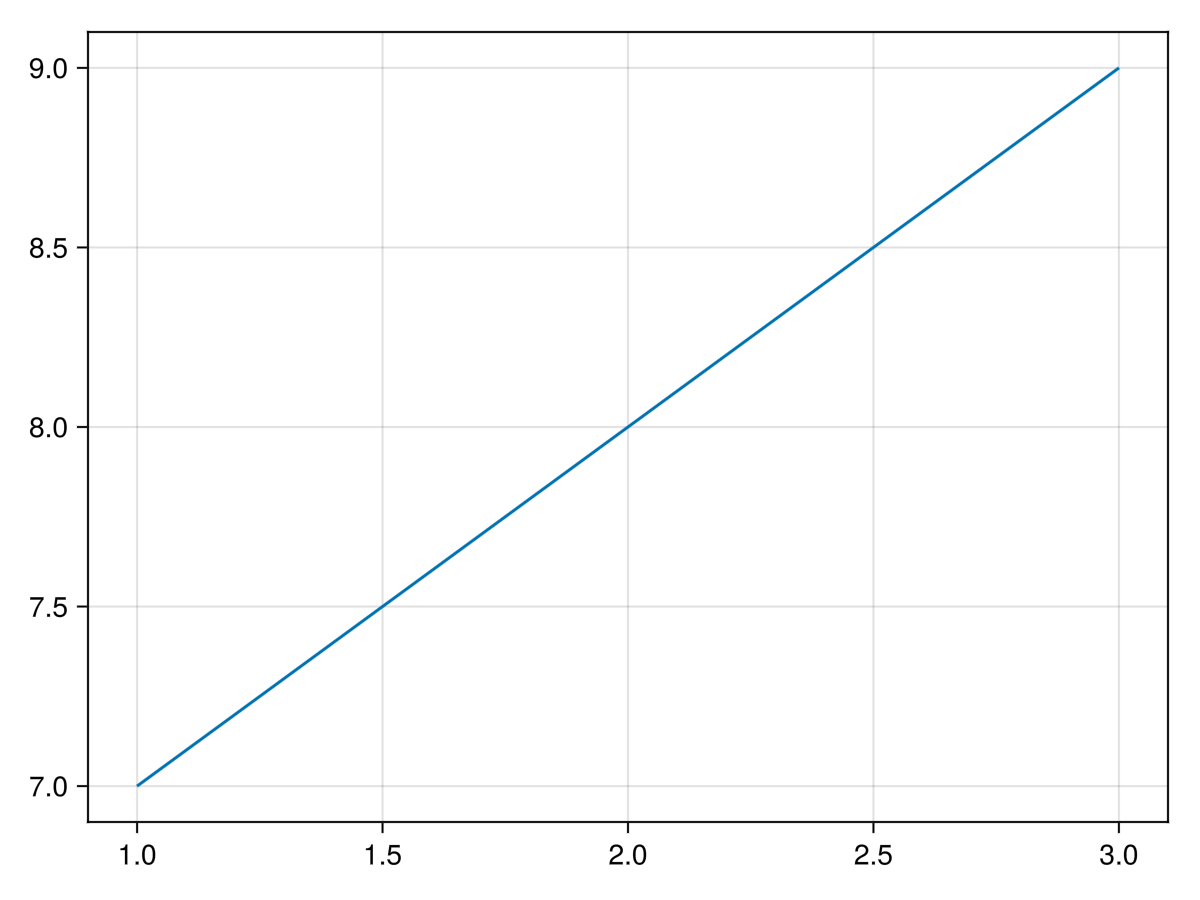

In [105]:
lines(A[:3, :])

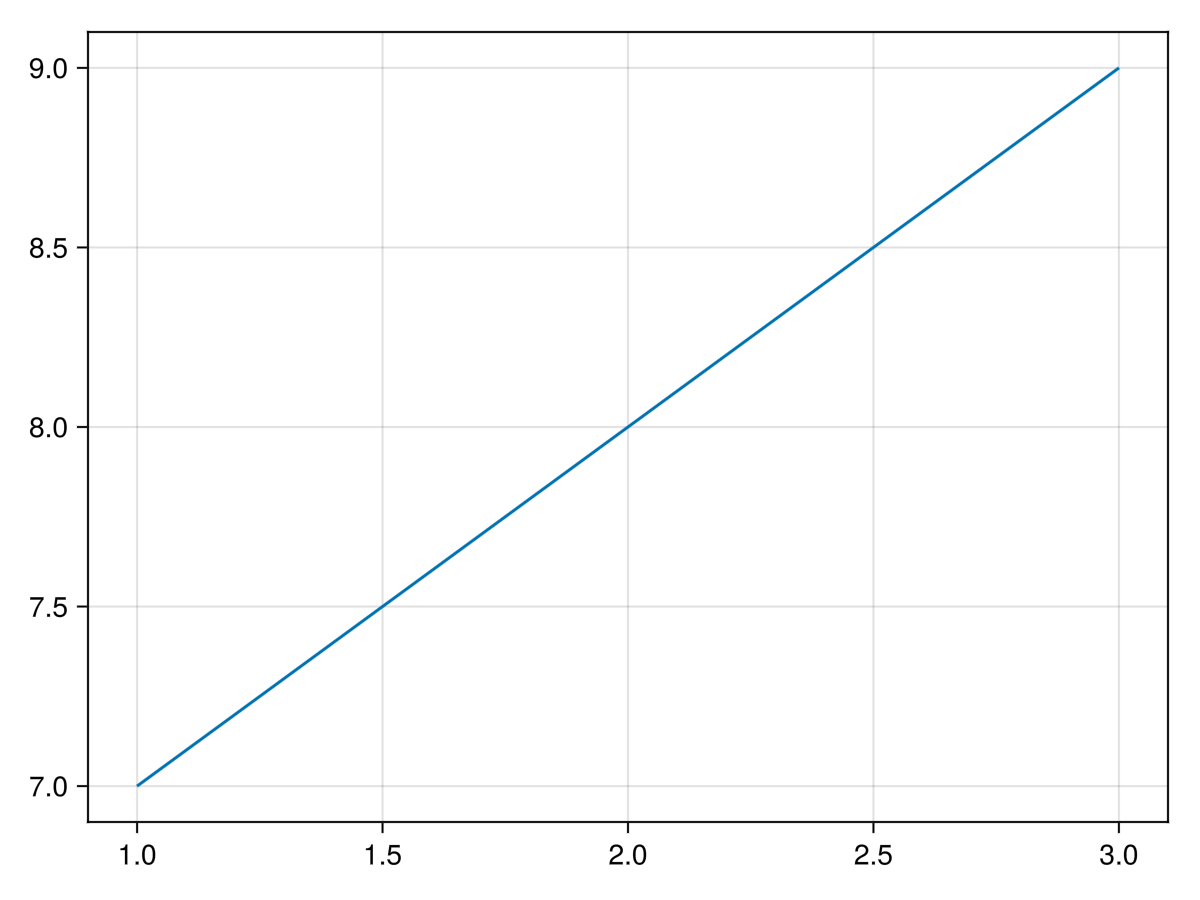

In [111]:
lines(A[:3, :])

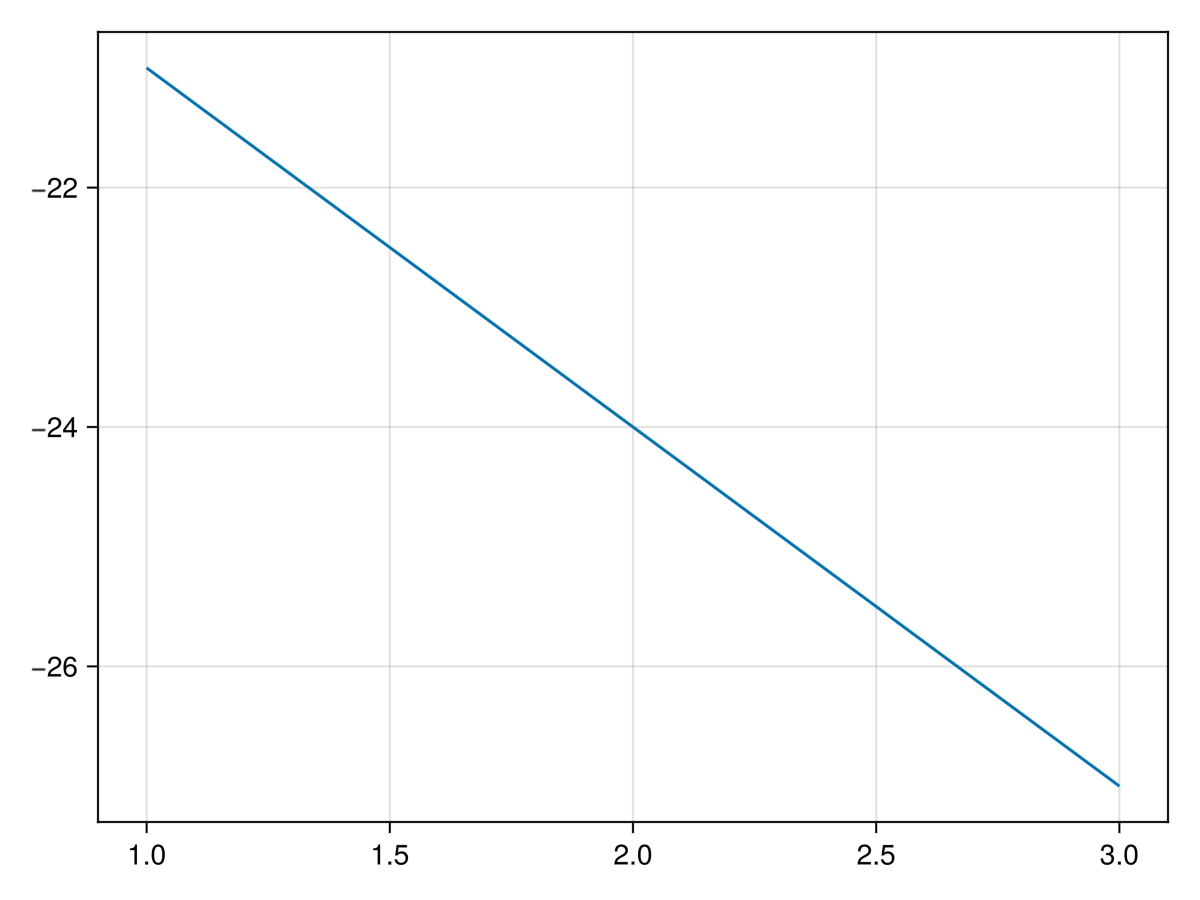

In [110]:
lines(A[:3, :] * det(A))

Could this be the same for the columns?

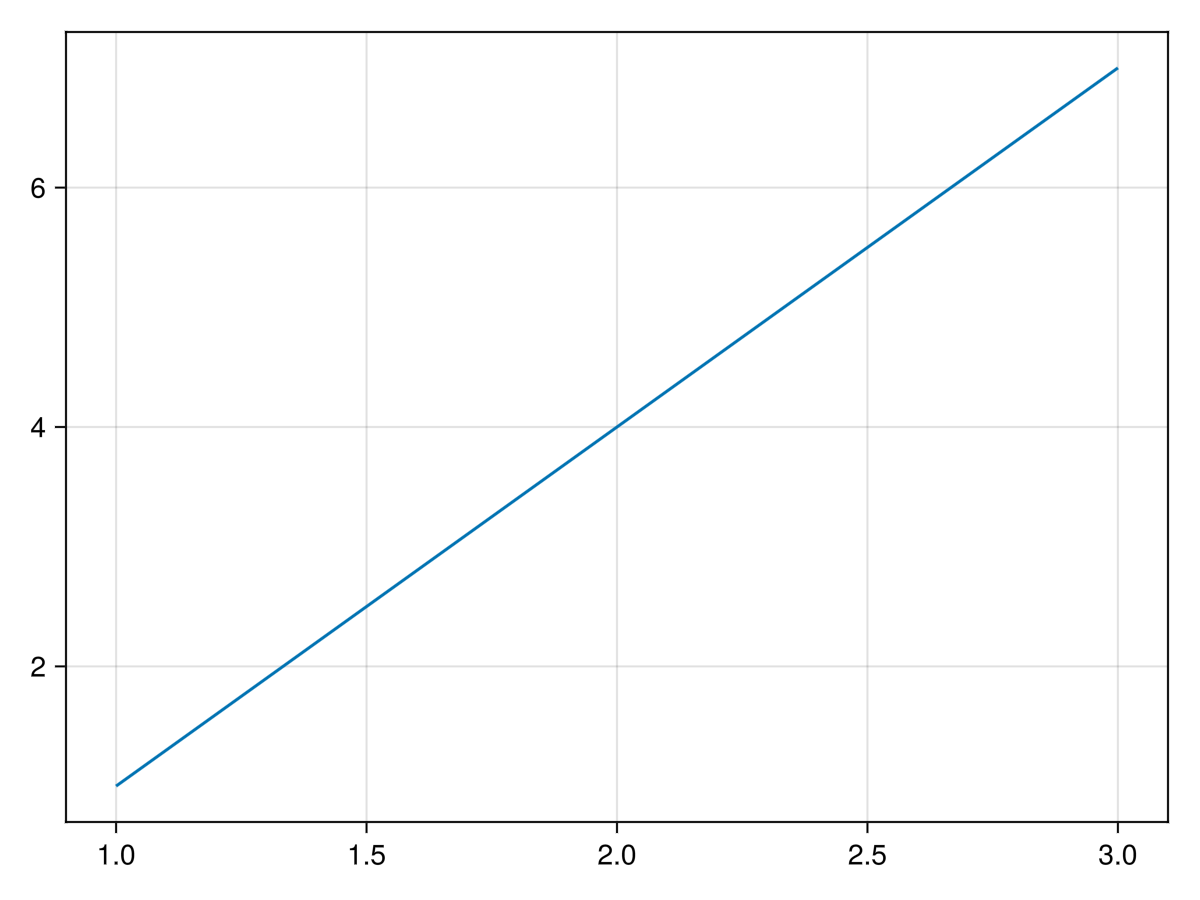

In [113]:
lines(A[:, :1])

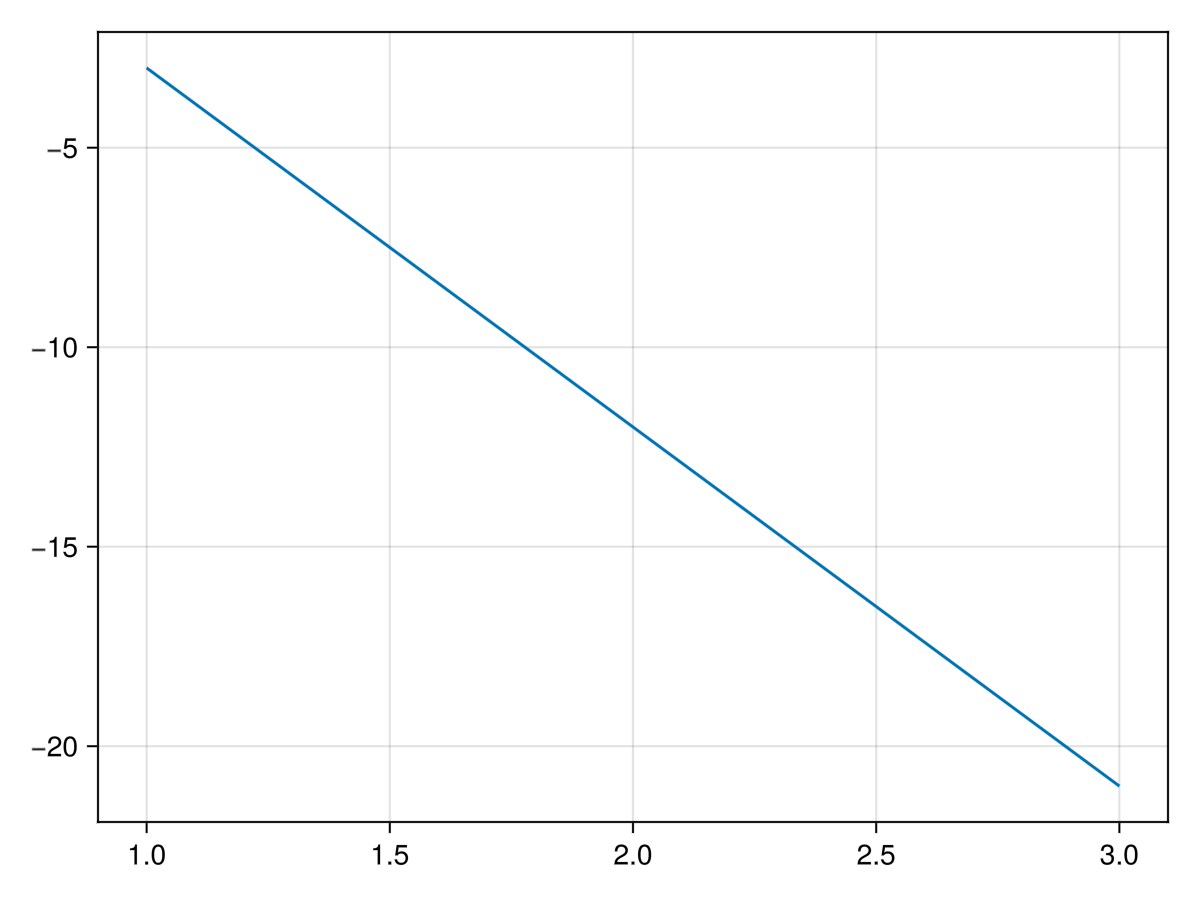

In [114]:
lines(A[:, :1] * det(A))

Looks like it is the inverse of all columns.

In [115]:
number_of_columns(A)

3

In [121]:
range(1, number_of_columns(A))

1:3

In [130]:
A

3×3 Matrix{Int64}:
 1  0  0
 4  5  6
 7  8  9

In [167]:
figure  = map( n -> lines(A[:, n]), range(1, number_of_columns(A)))

3-element Vector{Makie.FigureAxisPlot}:
 FigureAxisPlot()
 FigureAxisPlot()
 FigureAxisPlot()

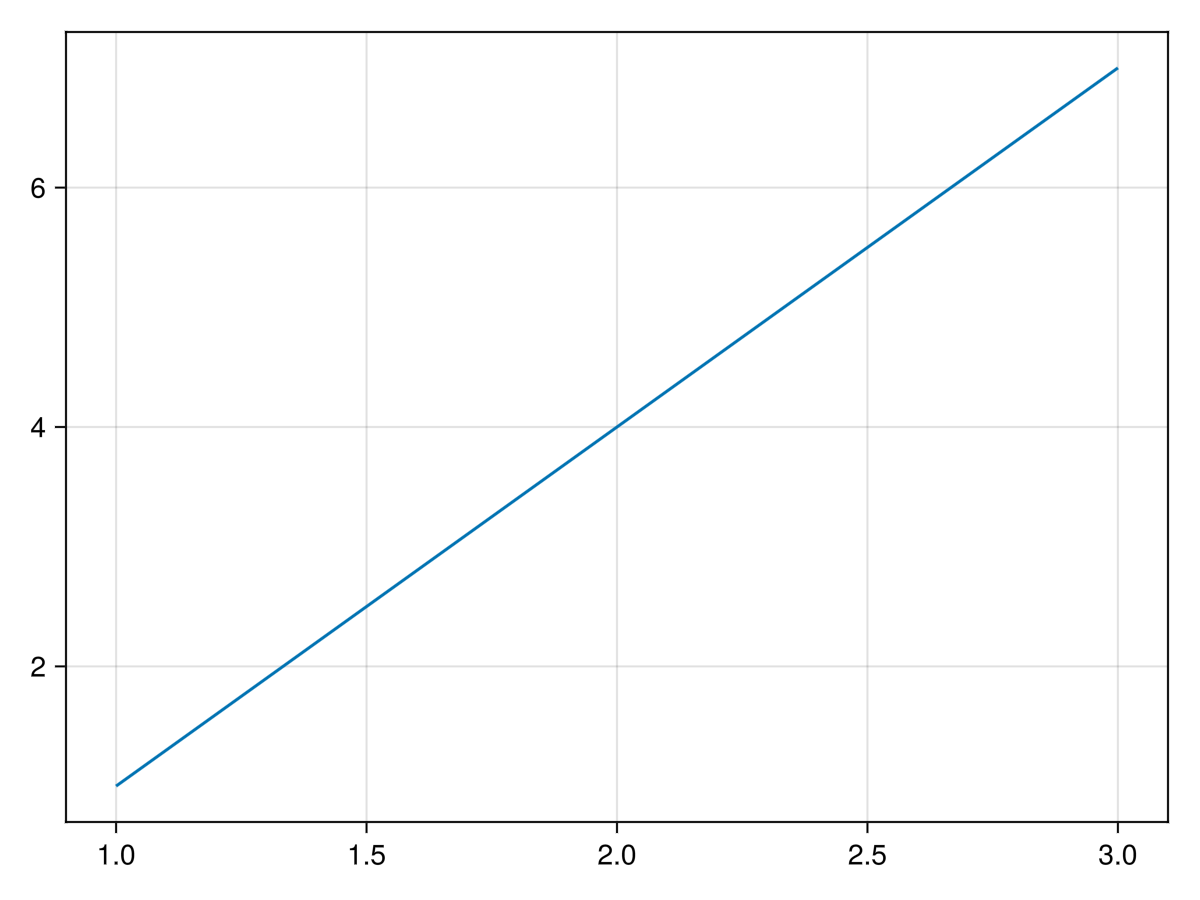

In [168]:
figure[1]


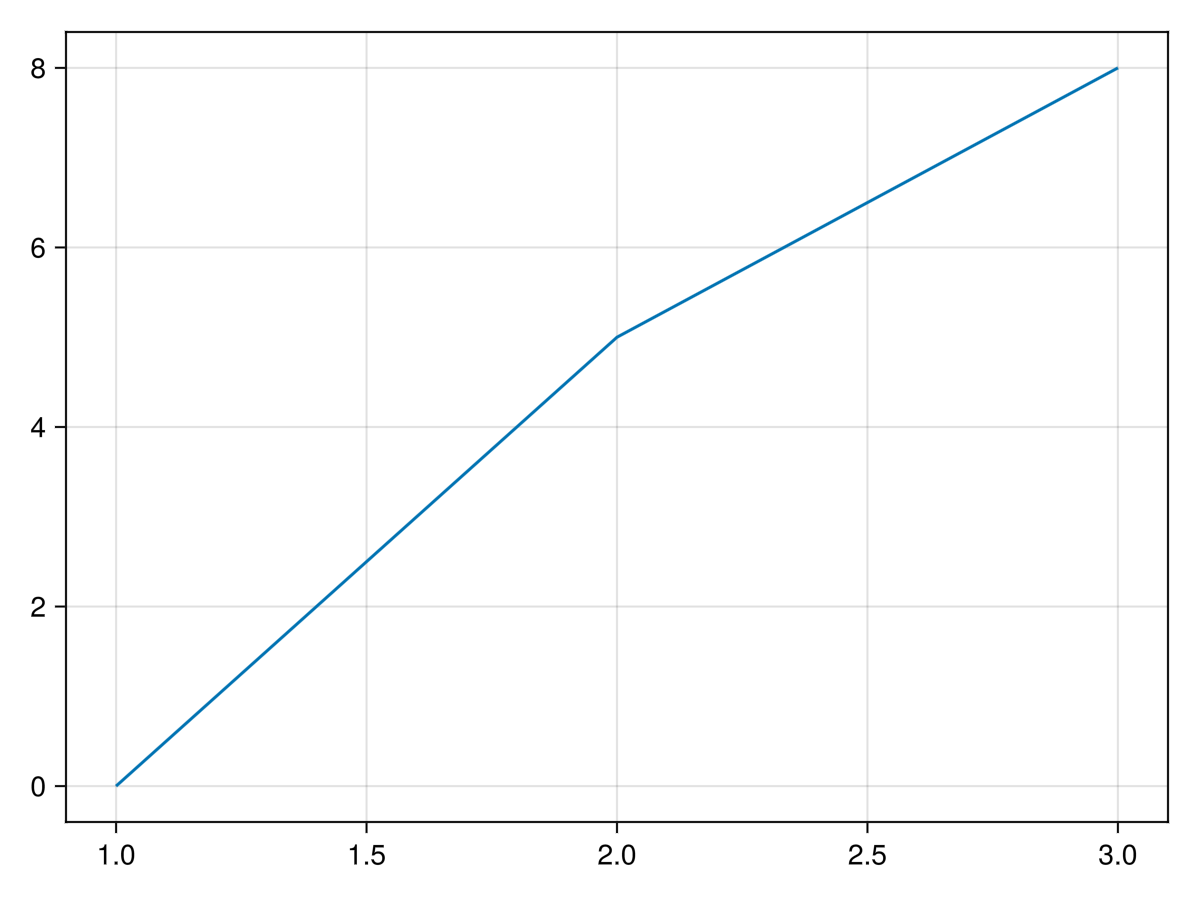

In [169]:
figure[2]

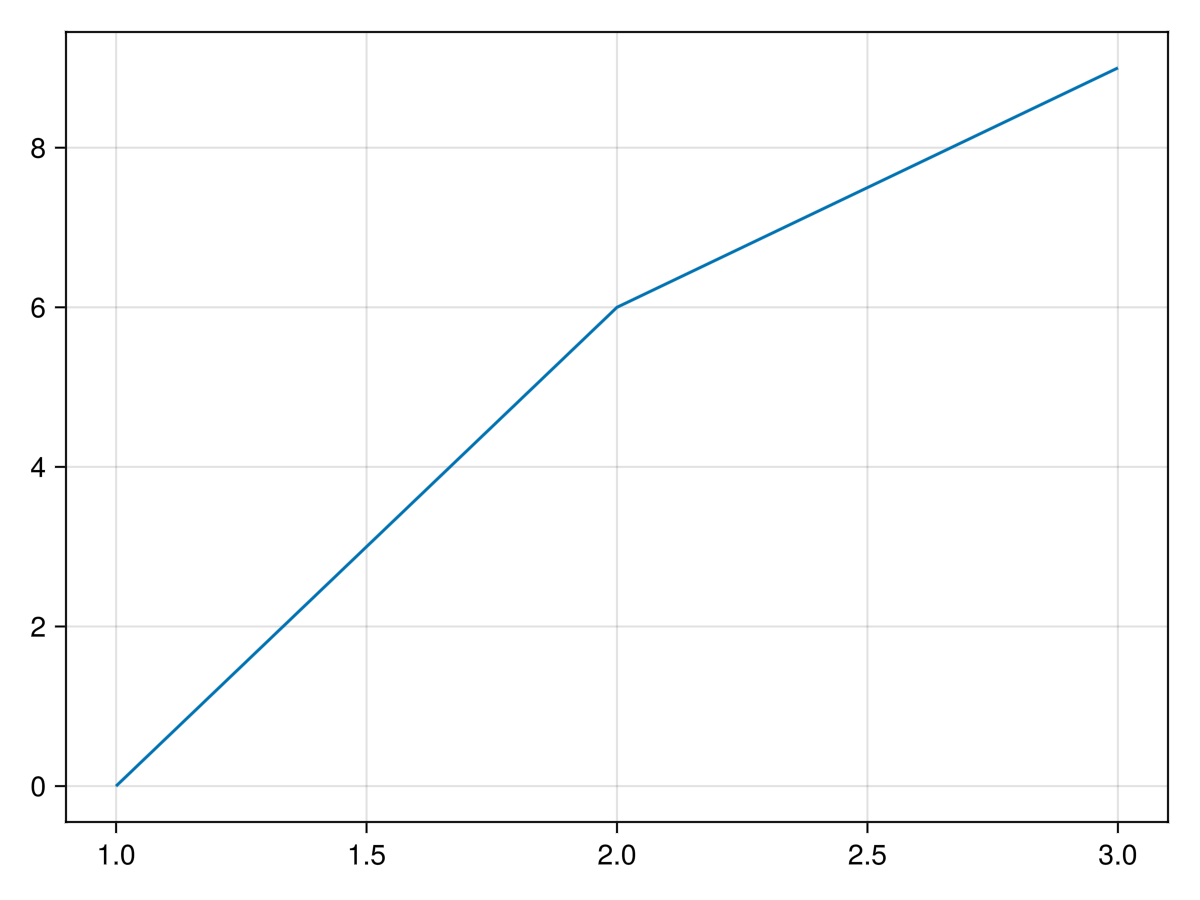

In [170]:
figure[3]

In [171]:
figure  = map( n -> lines(A[:, n] * det(A)), range(1, number_of_columns(A)))

3-element Vector{Makie.FigureAxisPlot}:
 FigureAxisPlot()
 FigureAxisPlot()
 FigureAxisPlot()

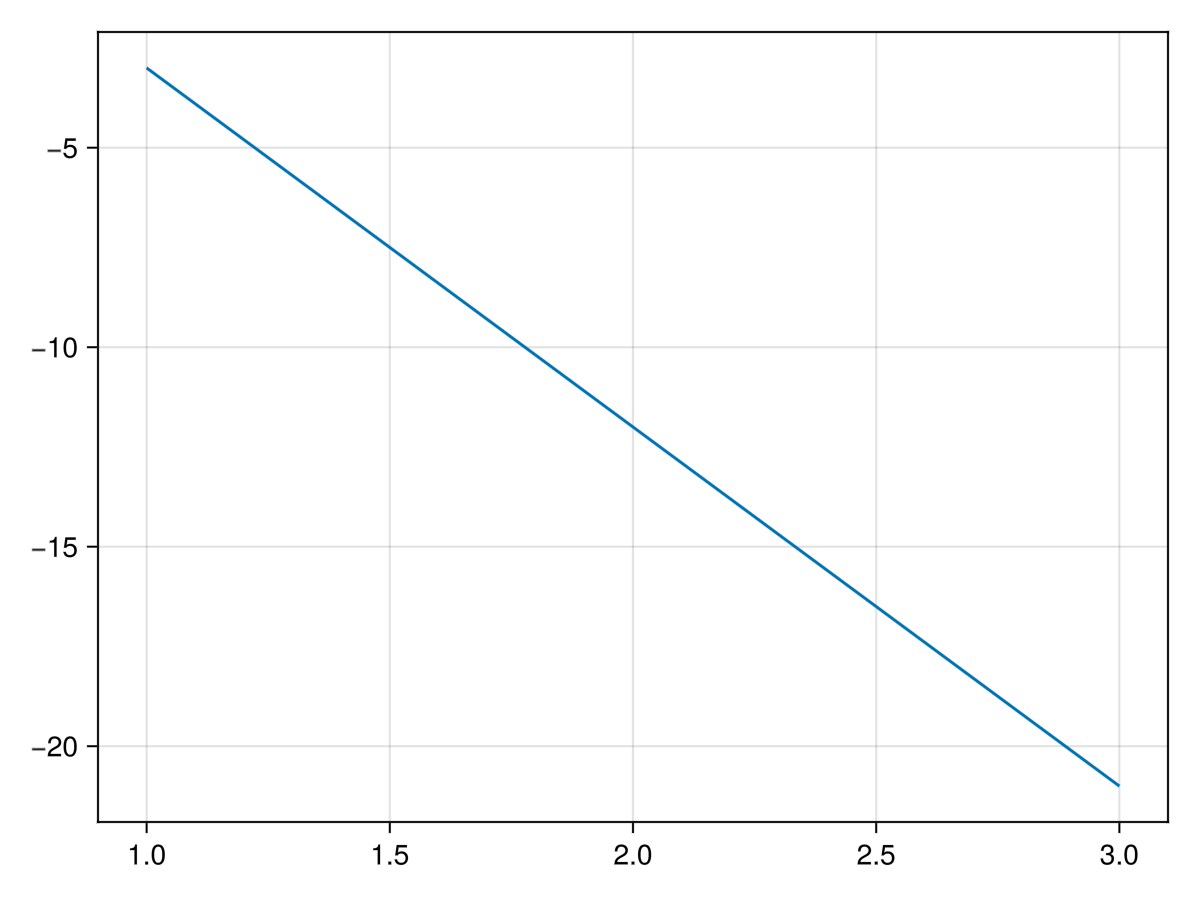

In [172]:
figure[1]

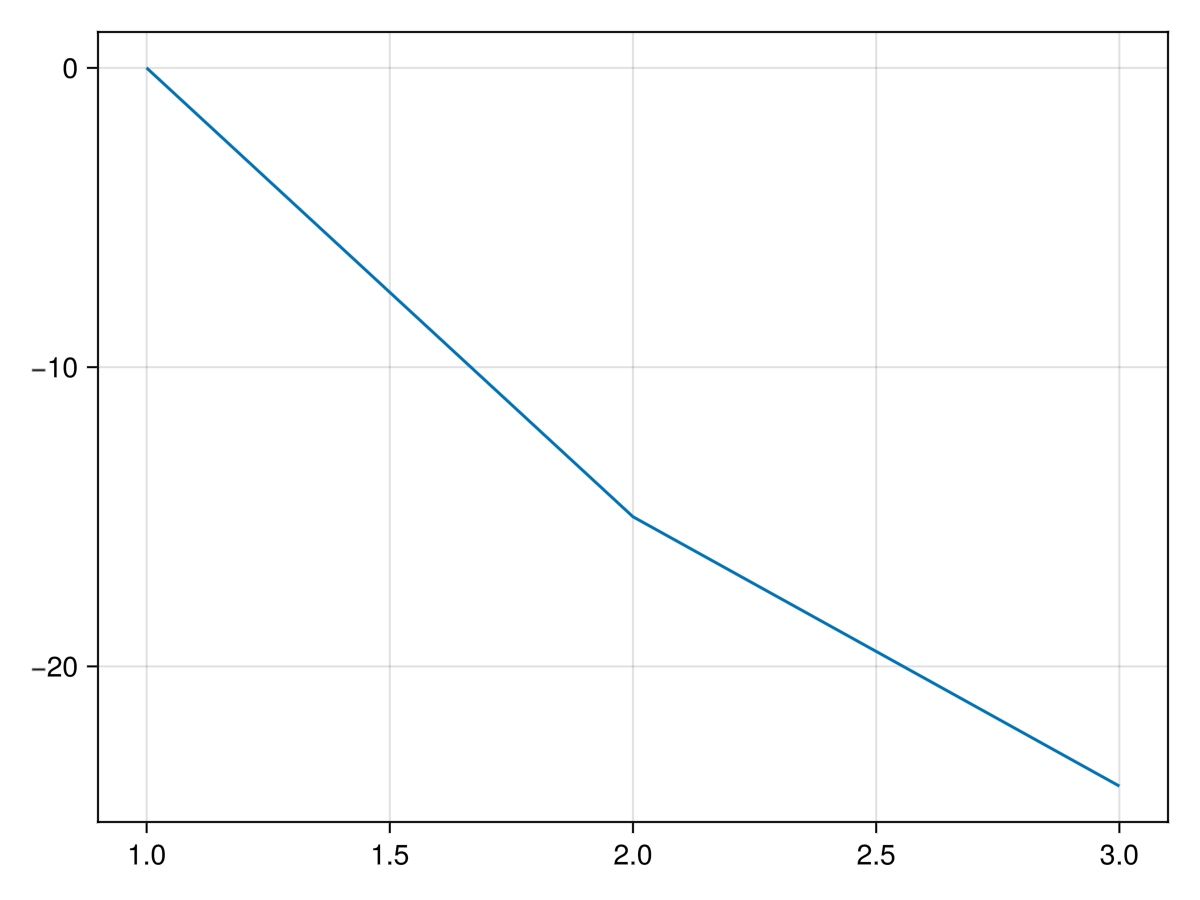

In [173]:
figure[2]

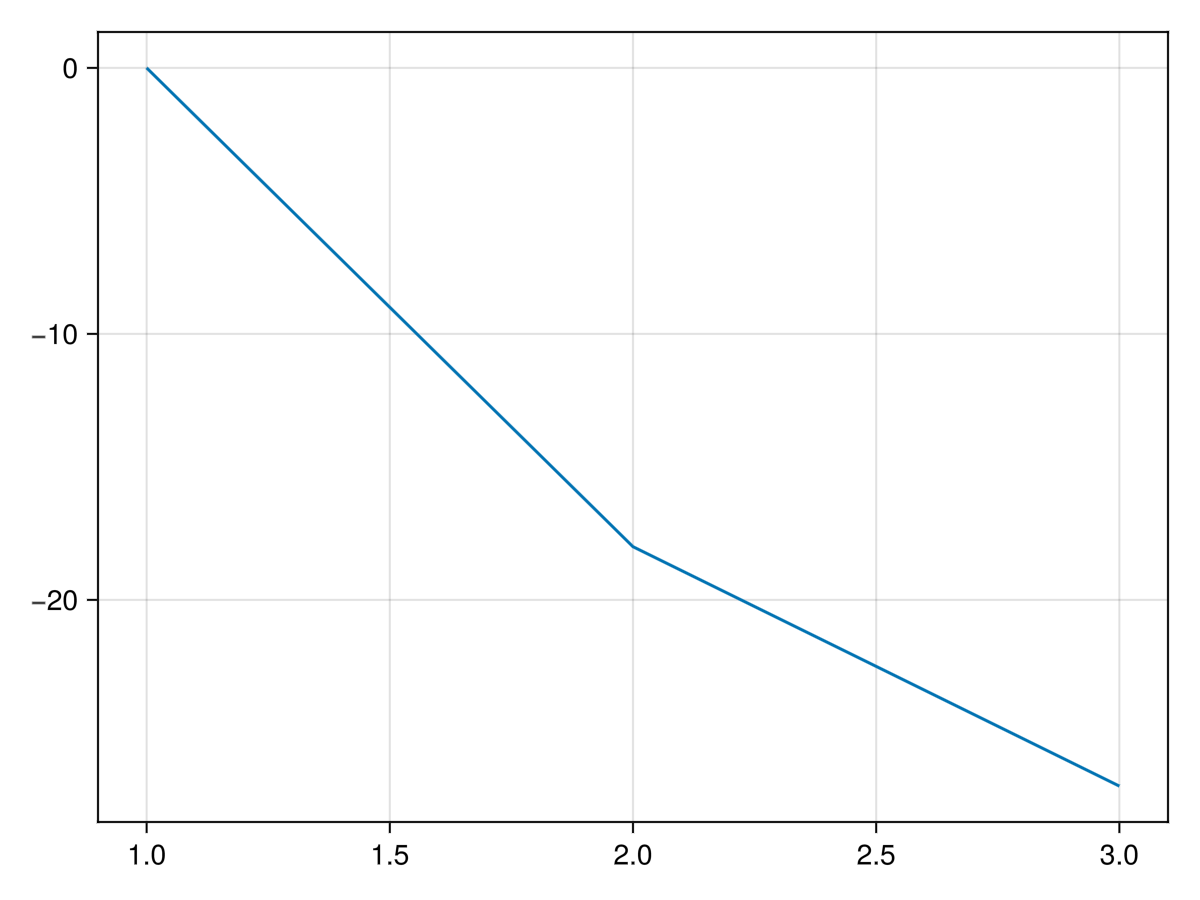

In [174]:
figure[3]

And Here is how the Matrix 3 X 3 change axis from x to y, if its multiply by the determinant and the inverse.

They reflect on the x and y axis.

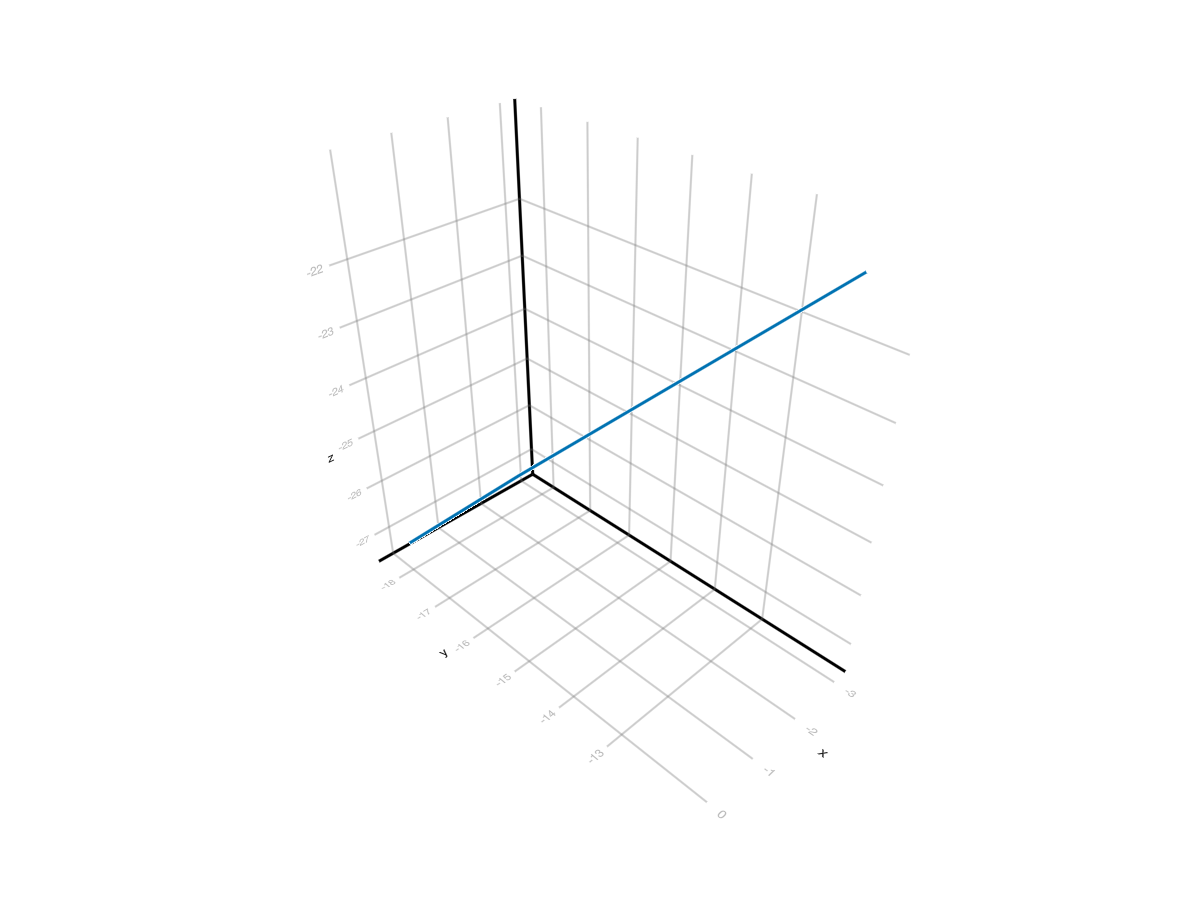

In [178]:
lines(det(A) * A)

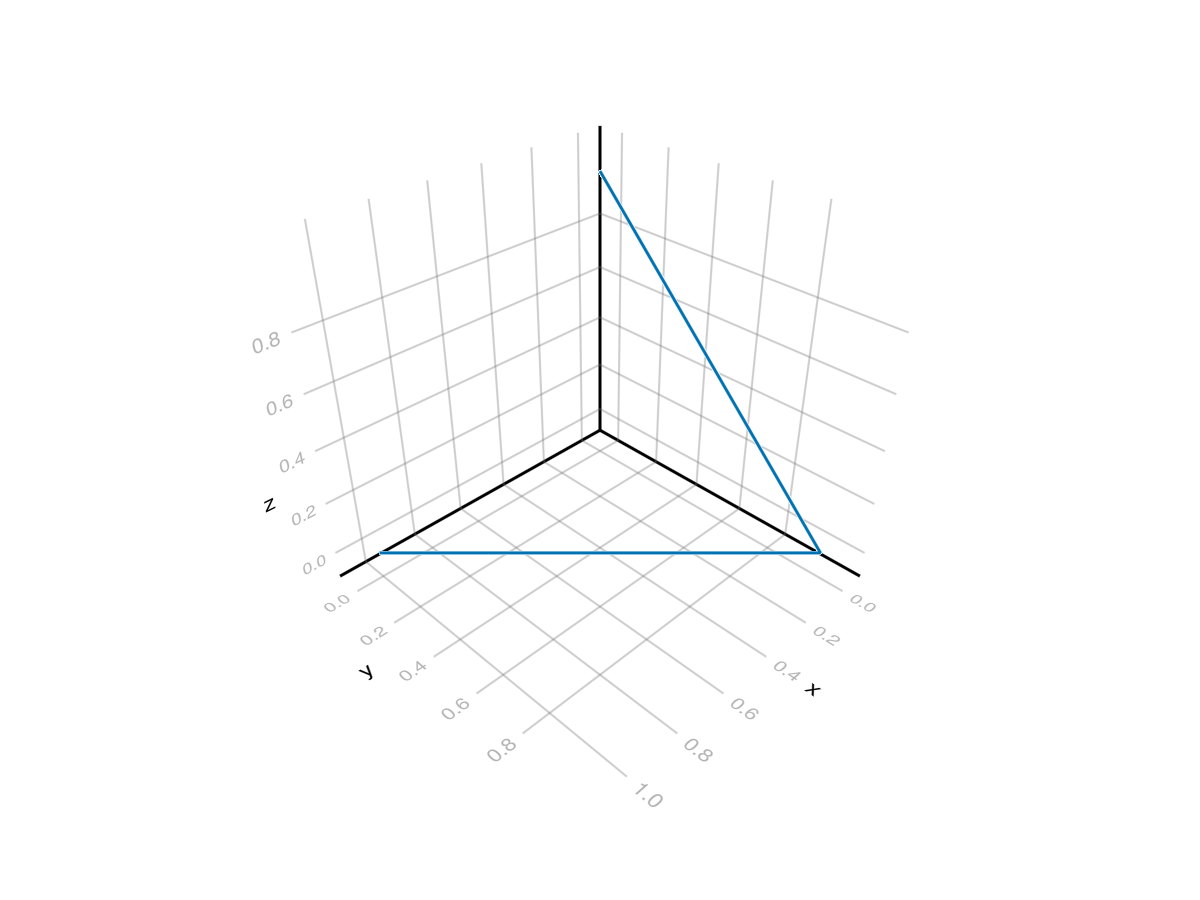

In [187]:
lines(inv(A) * A)